In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt
from sklearn.preprocessing import MinMaxScaler

<b>Importing and visulaising raw data</b>

In [3]:
new_blade1 = pd.read_csv('./Data/NewBlade001.csv')

In [4]:
new_blade1

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
0,-0.188000,-0.112131,-0.002490,-884606,0.000000,11128,2.504289,0.261085
1,-0.184000,-0.088931,-0.003863,-884606,17.166138,11128,-2.504289,0.260083
2,-0.180000,-0.115141,0.001630,-884606,-6.866455,11128,7.513016,0.259081
3,-0.176000,-0.111815,0.003003,-884606,-13.732910,11128,-2.504289,0.260083
4,-0.172000,-0.130970,0.004376,-884606,-6.866455,11128,0.000000,0.261085
...,...,...,...,...,...,...,...,...
2043,7.983999,0.438976,-0.023221,-877392,-926.971436,22329,2013.489258,0.643710
2044,7.987999,0.427332,-0.019023,-877396,-933.837891,22337,1968.411133,0.658649
2045,7.991999,0.340527,0.011973,-877400,-930.404663,22344,1993.454224,0.656947
2046,7.995999,0.339946,0.015117,-877403,-916.671753,22352,1980.932495,0.642398


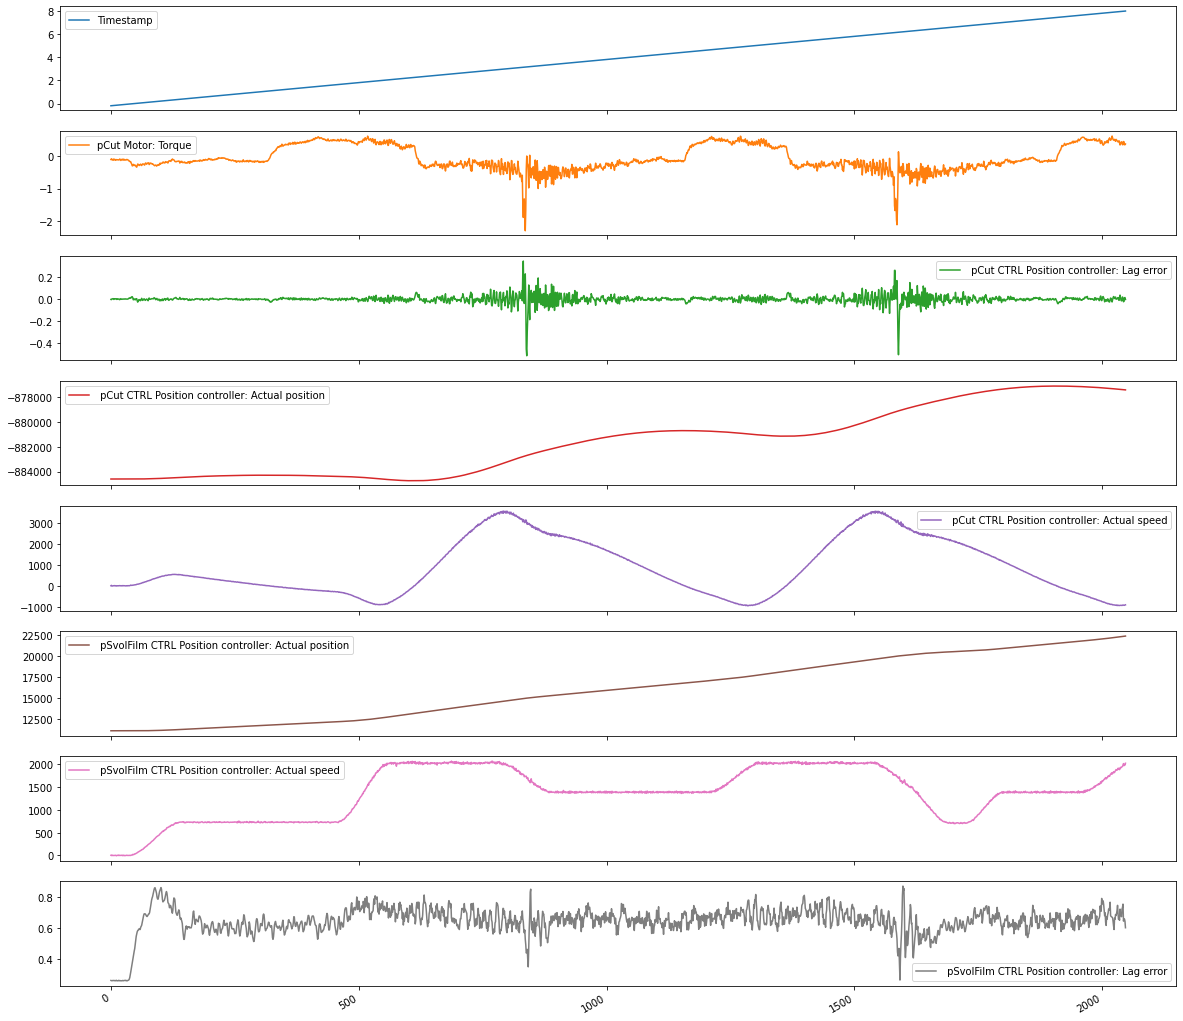

In [6]:
new_blade1.plot(subplots=True, figsize=(20,20))
plt.show()

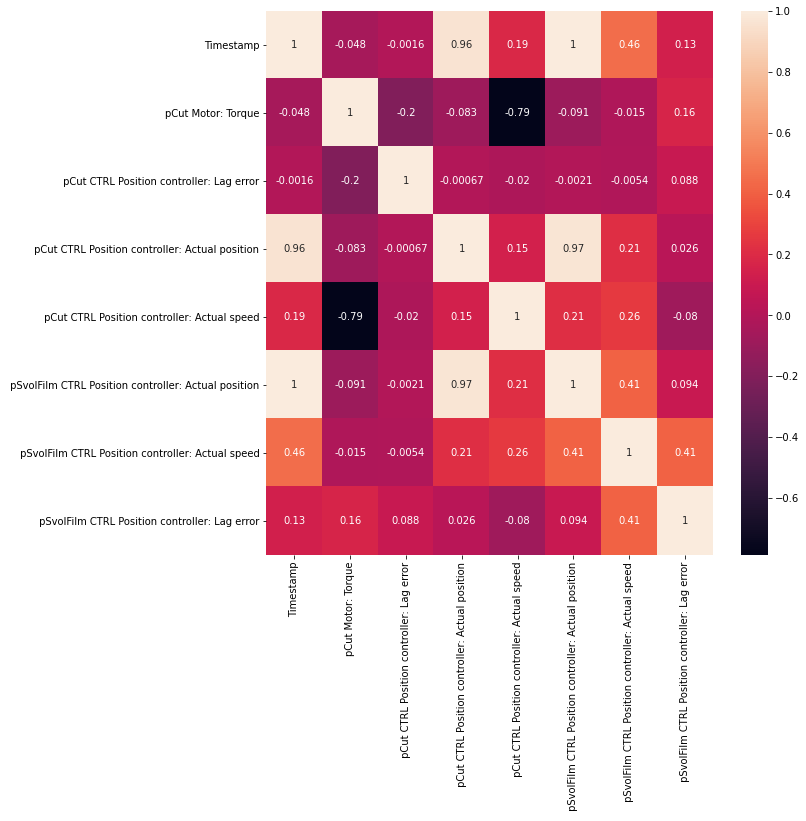

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(new_blade1.corr(), ax=ax, annot=True)
plt.show()

In [6]:
worn_blade1 = pd.read_csv('./Data/WornBlade001.csv')

In [9]:
worn_blade1

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
0,-0.188000,-0.001146,0.004242,-838822,0.000000,35096,5.008578,0.008014
1,-0.184000,0.014685,0.001495,-838822,6.866455,35096,0.000000,0.007012
2,-0.180000,0.023437,-0.001251,-838821,13.732910,35096,2.504289,0.008014
3,-0.176000,0.016672,-0.001251,-838821,-6.866455,35096,-2.504289,0.007012
4,-0.172000,0.002712,0.001495,-838822,-6.866455,35096,-5.008727,0.008014
...,...,...,...,...,...,...,...,...
2043,7.983999,0.347727,0.004621,-830704,-607.681274,48210,2038.532715,0.685780
2044,7.987999,0.327398,0.013264,-830706,-590.515137,48218,2026.010864,0.663441
2045,7.991999,0.323198,0.005949,-830709,-559.616089,48226,2033.523804,0.701209
2046,7.995999,0.338026,-0.001382,-830711,-556.182861,48234,2028.515137,0.709512


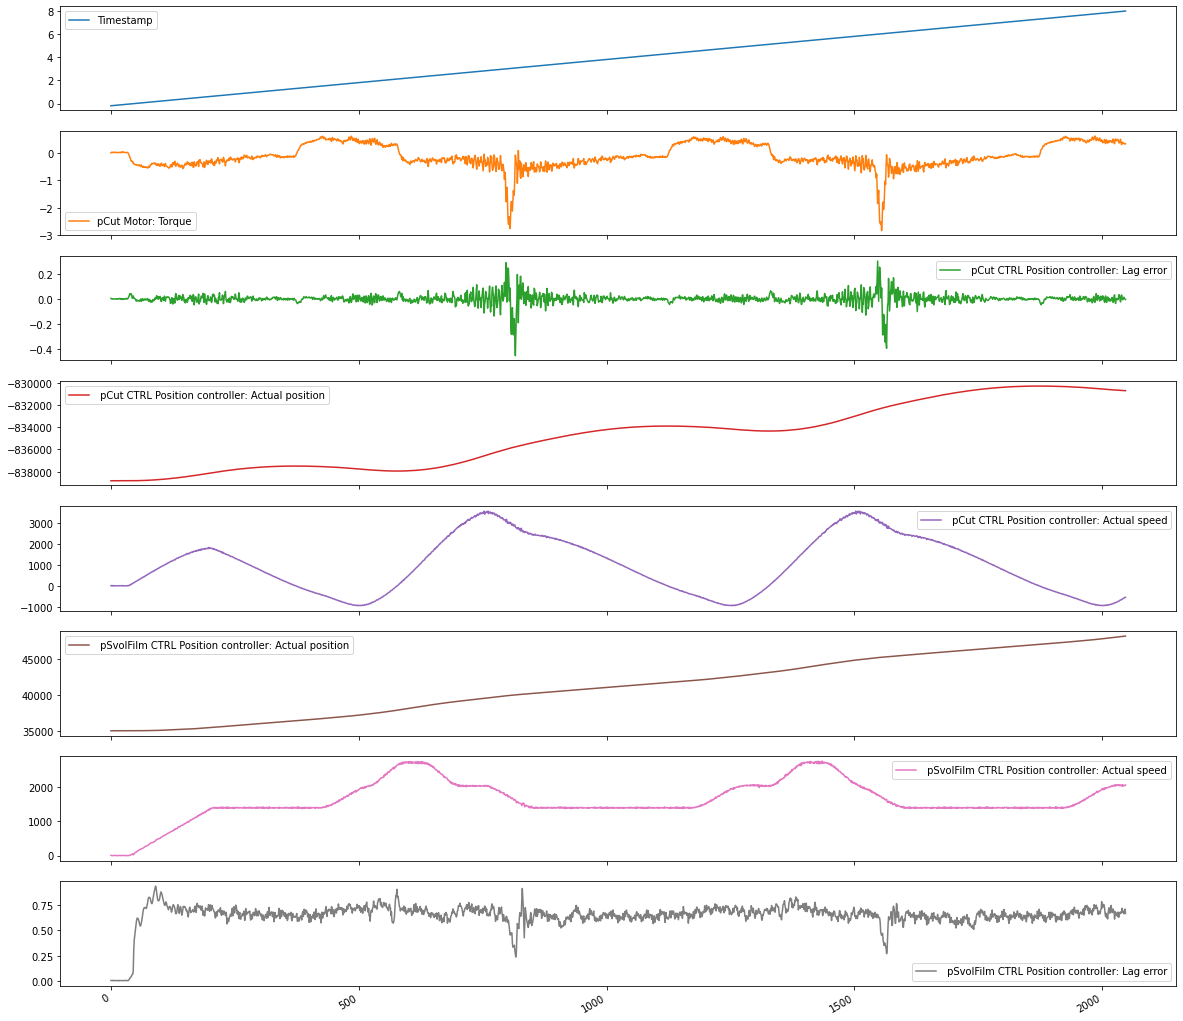

In [10]:
worn_blade1.plot(subplots=True, figsize=(20,20))
plt.show()

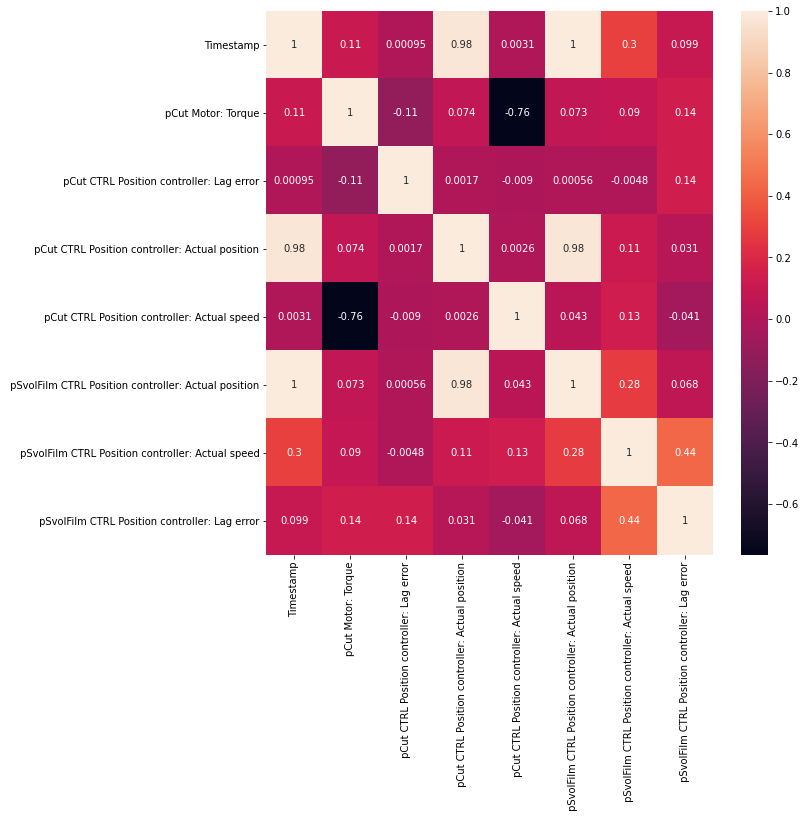

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(worn_blade1.corr(), ax=ax, annot=True)
plt.show()

In [7]:
new_blade1.rename(columns={"Timestamp":"Time Elapsed",
                         "pCut Motor: Torque":"CutMotorTorque",
                         " pCut CTRL Position controller: Lag error": "CutLagerror",
                         " pCut CTRL Position controller: Actual position" :"CutActualPosition",
                         " pCut CTRL Position controller: Actual speed":"CutActualSpeed",
                         " pSvolFilm CTRL Position controller: Actual position":"FilmActualPosition",
                         " pSvolFilm CTRL Position controller: Actual speed":"FilmActualSpeed",
                         " pSvolFilm CTRL Position controller: Lag error":"FilmLagError"},
                inplace=True)

worn_blade1.rename(columns={"Timestamp":"Time Elapsed",
                         " pCut Motor: Torque":"CutMotorTorque",
                         " pCut CTRL Position controller: Lag error": "CutLagerror",
                         " pCut CTRL Position controller: Actual position" :"CutActualPosition",
                         " pCut CTRL Position controller: Actual speed":"CutActualSpeed",
                         " pSvolFilm CTRL Position controller: Actual position":"FilmActualPosition",
                         " pSvolFilm CTRL Position controller: Actual speed":"FilmActualSpeed",
                         " pSvolFilm CTRL Position controller: Lag error":"FilmLagError"},
                inplace=True)

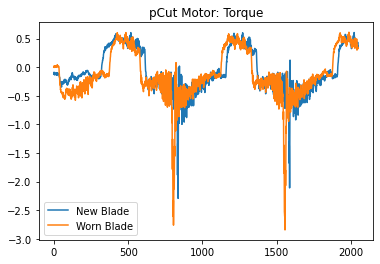

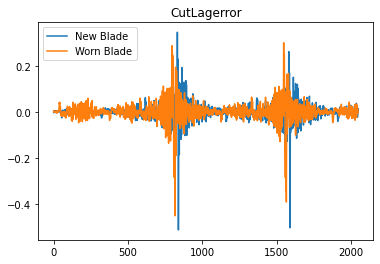

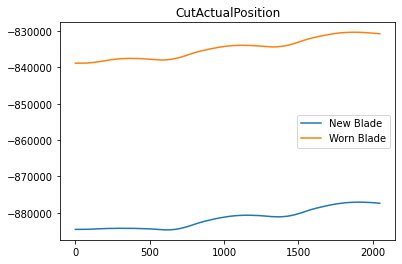

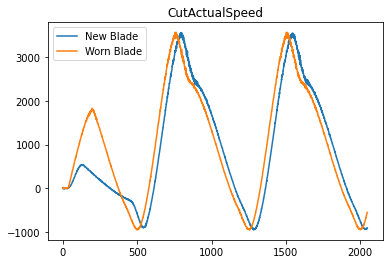

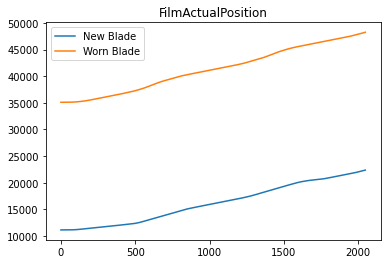

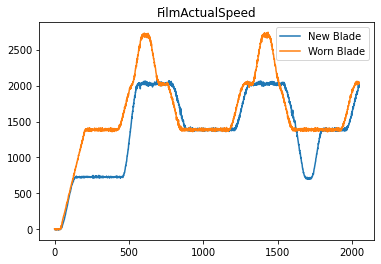

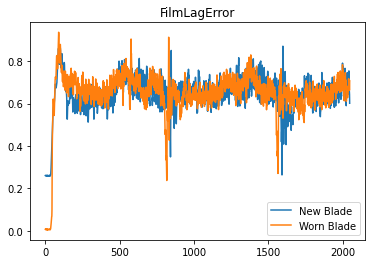

In [21]:
# comparing each feature for new and worn blade
features = worn_blade1.columns
for feature in features:
    if feature == 'Time Elapsed':
        continue
    plt.plot(new_blade1[feature])
    plt.plot(worn_blade1[feature])
    plt.title(feature)
    plt.legend(['New Blade', 'Worn Blade'])
    plt.show()

<b>Change point analysis</b>

CutMotorTorque


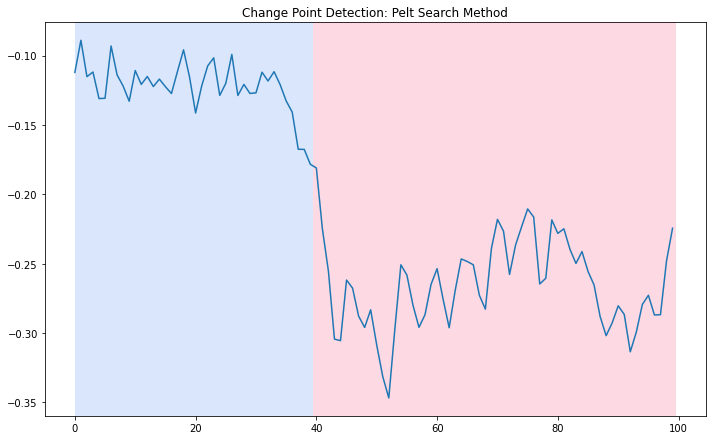

In [10]:
temp_new = new_blade1[0:100]
features = new_blade1.columns
for feature in features:
    if feature == 'Time Elapsed':
        continue
    print(feature)
    temp = np.array(temp_new[feature])
    model="rbf"
    algo = rpt.Pelt(model=model).fit(temp)
    result = algo.predict(pen=10)
    rpt.display(temp, result, figsize=(10, 6))
    plt.title('Change Point Detection: Pelt Search Method')
    plt.show()
    break

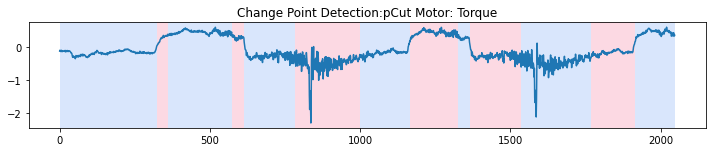

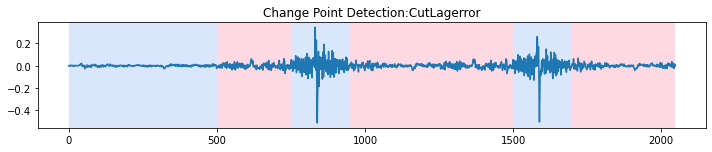

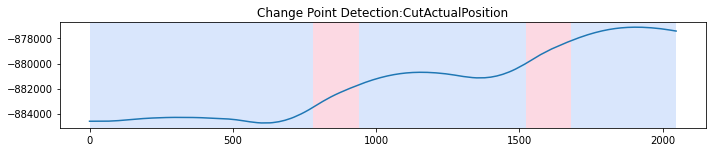

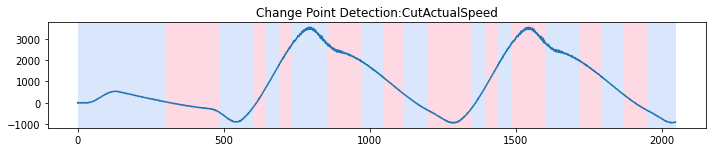

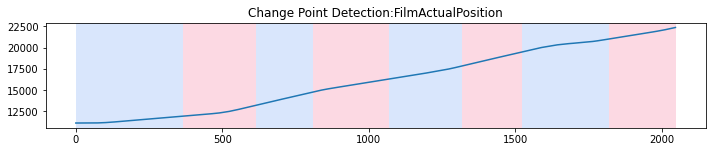

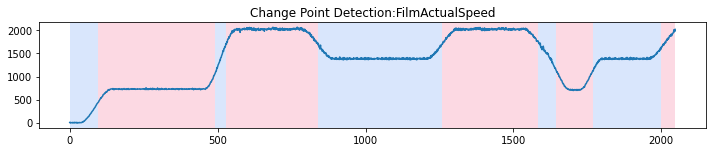

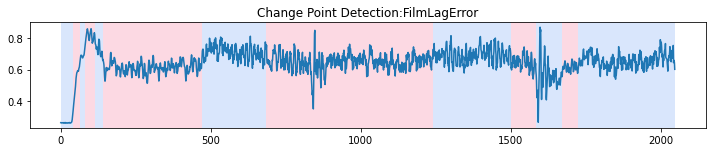

In [31]:
features = new_blade1.columns
for feature in features:
    if feature == 'Time Elapsed':
        continue
    temp = np.array(new_blade1[feature])
    model="rbf"
    algo = rpt.Pelt(model=model).fit(temp)
    result = algo.predict(pen=10)
    rpt.display(temp, result)
    plt.title('Change Point Detection:' + feature)
    plt.show()

<b>Normalising and Comparing all features together</b>

In [32]:
scaler = MinMaxScaler() 
scaled_new = scaler.fit_transform(new_blade1.iloc[:,0:8])
scaled_new = pd.DataFrame(scaled_new, columns = new_blade1.columns)

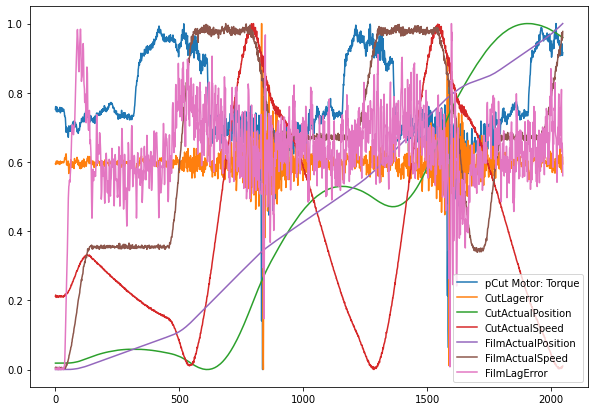

In [33]:
features = scaled_new.columns[1:8]
fig = plt.figure(figsize =(10, 7)) 
for feature in features:
    plt.plot(scaled_new[feature])
plt.legend(features)
plt.show()

<b>Feature and its change point analysis</b>

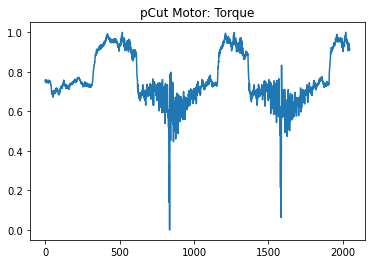

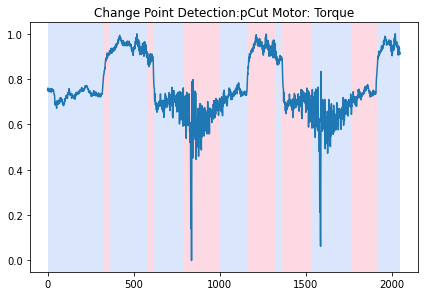

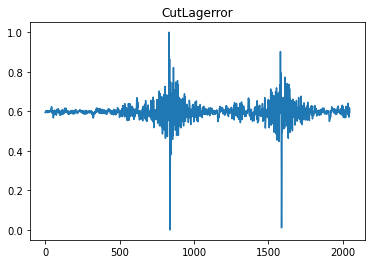

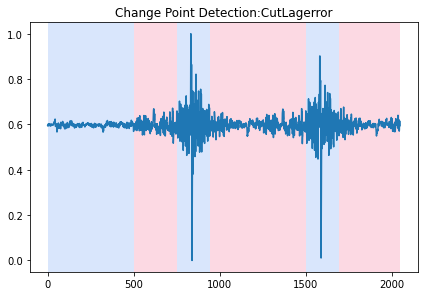

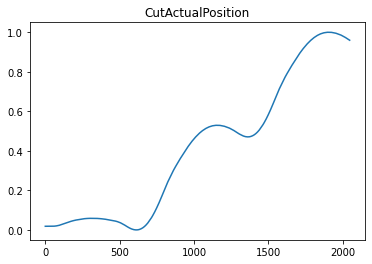

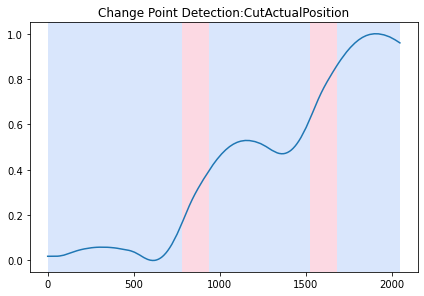

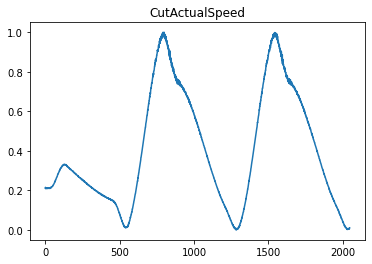

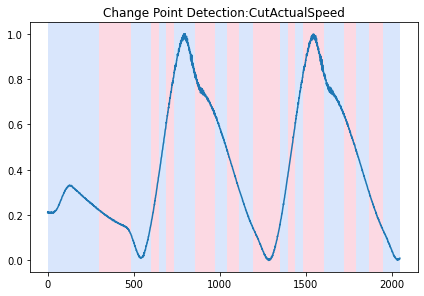

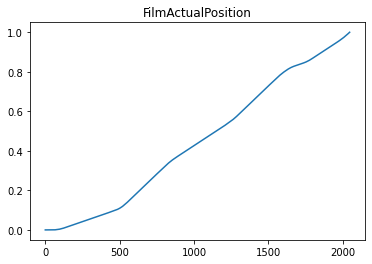

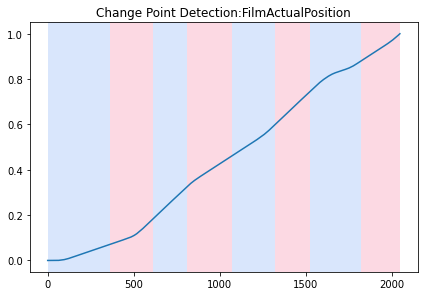

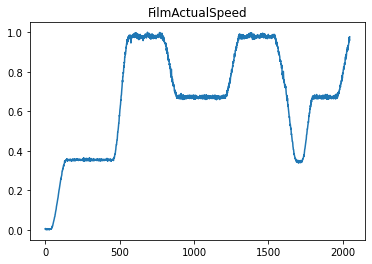

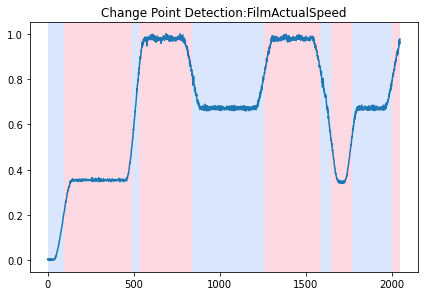

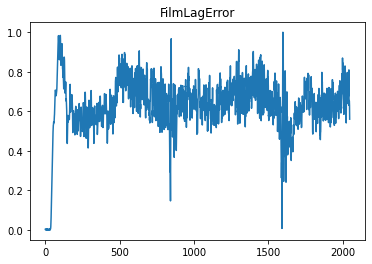

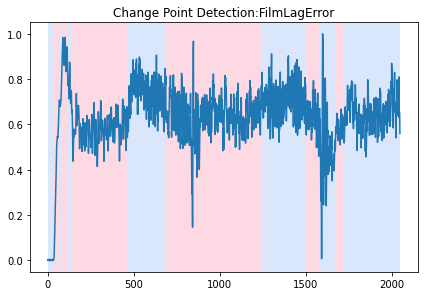

In [52]:
features = scaled_new.columns[1:8] 
for feature in features:
    fig = plt.figsize=(15, 7)
    plt.plot(scaled_new[feature])
    plt.title(feature)
    
    temp = np.array(scaled_new[feature])
    model="rbf"
    algo = rpt.Pelt(model=model).fit(temp)
    result = algo.predict(pen=10)
    rpt.display(temp, result, figsize=(6, 4))
    plt.title('Change Point Detection:' + feature)
    
    plt.show()